In [1]:
import keras
keras.__version__

2022-10-07 11:42:10.437123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 11:42:11.590822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-07 11:42:11.590851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-07 11:42:11.757344: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 11:42:14.874181: W tensorflow/stream_executor/platform/de

'2.10.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Logistic regression as an intro. to Neural Networks

This notebook **adapts** the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

**We will see this first as a Logistic (= classification) Regression problem, and then we will see exactly the same process but using keras modules (once we know what an Artificial Neural Network is and how it is computed).**


The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Cargar datos con los 4 conjuntos

11490434/11490434 [==============================] - 3s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

**IMPORTANT: THINK ON WHAT YOU SHOULD DO TO USE THE X -PREDICTORS- IN THE SAME WAY AS YOU DID IN SCI-KIT LEARN PREVIOUS EXAMPLE**

In [4]:
train_images.shape

(60000, 28, 28)

In [8]:
type(train_images)
train_images[15:20, :, :]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

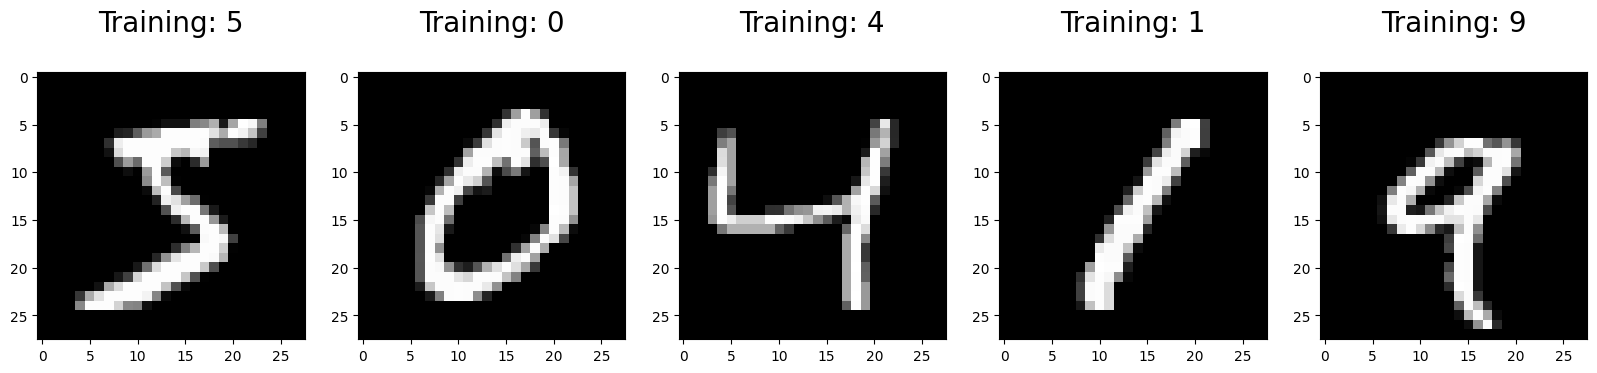

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**HINT (and an advance on numpy matrices):**

For convenience, you should now reshape images of shape (num_px, num_px, 1) -monochrome, CAVEAT THIS WILL BE DIFFERENT WITH RGB IMAGES- in a numpy-array of shape (num_px ∗ num_px). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

A trick when you want to flatten a matrix X of shape (a,b,c) to a matrix X_flatten of shape (a, b∗c) is to use:

X_flatten = X.reshape(X.shape[0], -1)

In [10]:
X_train = train_images.reshape(train_images.shape[0], -1)

In [11]:
X_train.shape

(60000, 784)

In [12]:
y_train = train_labels

In [13]:
len(y_train)

60000

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Do the same with test set. Will you have to do same as you did with the training set?

In [ ]:
test_images.shape

# Display some MNIST digits

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


# Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

## Step 1. Import the model you want to use

## Step 2. Make an instance of the Model

## Step 3. Training the model on the data, storing the information learned from the data

## Step 4. Predict labels for new data (new images)

## Make predictions on entire test data

# Measuring Model Performance (Digits Dataset)

## Confusion Matrix (Digits Dataset)